<a href="https://colab.research.google.com/github/sandbox259/Sales-Analysis/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
orders_df = pd.read_csv("/content/List_of_Orders_55FFC79CF8.csv")
order_details_df = pd.read_csv("/content/Order_Details_19795F61CF.csv")
sales_target_df = pd.read_csv("/content/Sales_target_DD2E9B96A0.csv")

In [ ]:
# Merge datasets on 'Order ID'
merged_df = pd.merge(order_details_df, orders_df, on="Order ID")
merged_df.head()

,Order ID,Amount,Profit,Quantity,Category,Sub-Category,Order Date,CustomerName,State,City
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25601,66.0,-12.0,5,Clothing,Stole,01-04-2018,Bharat,Gujarat,Ahmedabad
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief,01-04-2018,Bharat,Gujarat,Ahmedabad
3,B-25601,80.0,-56.0,4,Electronics,Electronic Games,01-04-2018,Bharat,Gujarat,Ahmedabad
4,B-25602,168.0,-111.0,2,Electronics,Phones,01-04-2018,Pearl,Maharashtra,Pune


In [ ]:
# Total Sales per Category
total_sales = merged_df.groupby("Category")["Amount"].sum().reset_index()


In [ ]:
# Average Profit per Order and Profit Margin
profit_analysis = merged_df.groupby("Category").agg({"Profit": ["sum", "mean"], "Amount": "sum"})
profit_analysis["Profit Margin"] = (profit_analysis.loc[:, ("Profit", "sum")] / profit_analysis.loc[:, ("Amount", "sum")]) * 100
profit_analysis = profit_analysis.reset_index()

In [ ]:
# Identify top-performing and underperforming categories
top_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=False).iloc[0]
underperforming_category = profit_analysis.sort_values(by=("Profit", "sum"), ascending=True).iloc[0]


In [ ]:
# Calculate Month-over-Month Percentage Change in Furniture Sales Target
sales_target_df["Previous Target"] = sales_target_df[sales_target_df["Category"] == "Furniture"]["Target"].shift(1)
sales_target_df["Percentage Change"] = ((sales_target_df["Target"] - sales_target_df["Previous Target"]) / sales_target_df["Previous Target"]) * 100


In [ ]:
# Identify significant fluctuations
significant_fluctuations = sales_target_df[sales_target_df["Percentage Change"].abs() > 5]  # Assuming >5% is significant

In [ ]:
# Top 5 states with highest order count
top_states = orders_df["State"].value_counts().head(5)

In [ ]:
# Total Sales and Average Profit per Top State
top_states_sales_profit = merged_df[merged_df["State"].isin(top_states.index)].groupby("State").agg({"Amount": "sum", "Profit": "mean"}).reset_index()


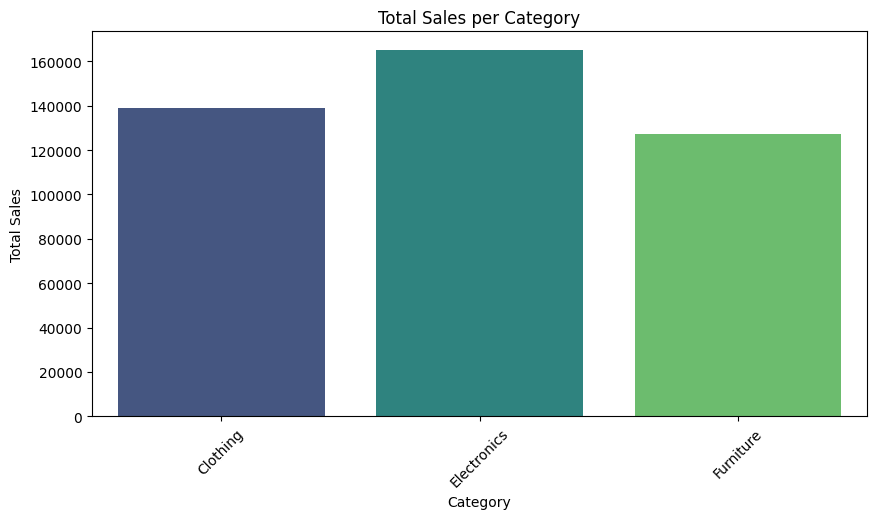

In [ ]:
# Sales per Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Amount", data=total_sales, hue="Category", palette="viridis", legend=False)
plt.title("Total Sales per Category")
plt.xlabel("Category")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()

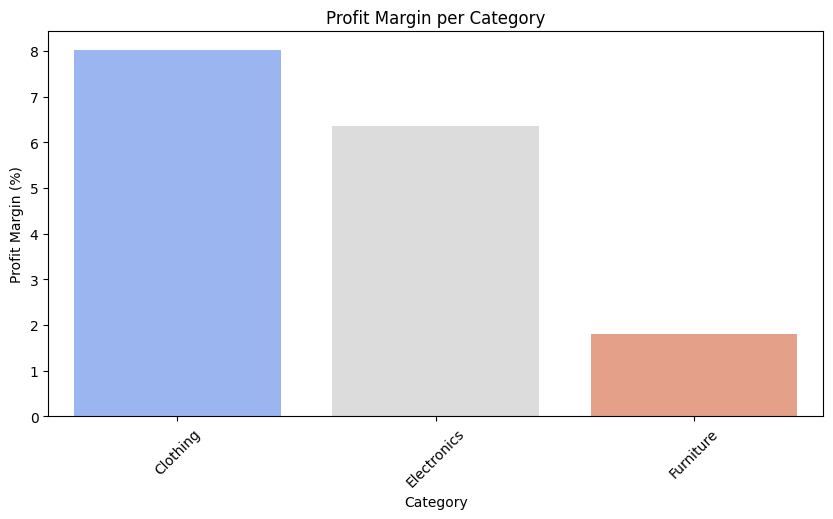

In [ ]:
# Profit Margin per Category
plt.figure(figsize=(10, 5))
sns.barplot(x="Category", y="Profit Margin", data=profit_analysis, hue="Category", palette="coolwarm", legend = False)
plt.title("Profit Margin per Category")
plt.xlabel("Category")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()

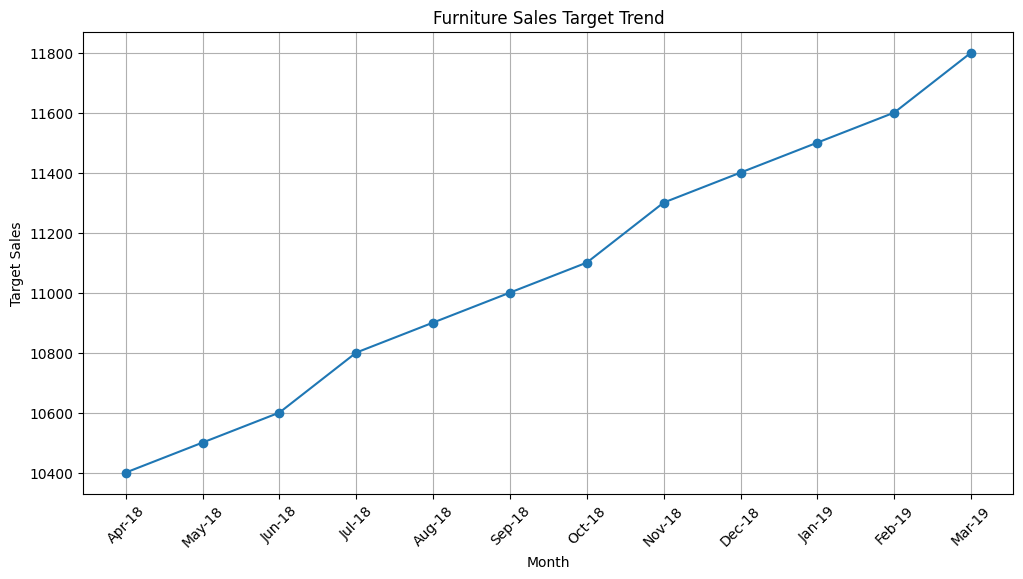

In [ ]:
# Target Sales Trend for Furniture
plt.figure(figsize=(12, 6))
plt.plot(sales_target_df[sales_target_df["Category"] == "Furniture"]["Month of Order Date"], sales_target_df[sales_target_df["Category"] == "Furniture"]["Target"], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.title("Furniture Sales Target Trend")
plt.xlabel("Month")
plt.ylabel("Target Sales")
plt.grid()
plt.show()

In [ ]:
# Display results
print("Total Sales per Category:\n", total_sales)
print("\nSales Profitability Analysis:\n", profit_analysis)
print("\nTop Performing Category:\n", top_category)
print("\nUnderperforming Category:\n", underperforming_category)
print("\nSignificant Target Fluctuations:\n", significant_fluctuations)
print("\nTop 5 States by Order Count:\n", top_states)
print("\nSales and Profit for Top 5 States:\n", top_states_sales_profit)

Total Sales per Category:
       Category    Amount
0     Clothing  139054.0
1  Electronics  165267.0
2    Furniture  127181.0

Sales Profitability Analysis:
       Category   Profit               Amount Profit Margin
                    sum       mean       sum              
0     Clothing  11163.0  11.762908  139054.0      8.027817
1  Electronics  10494.0  34.071429  165267.0      6.349725
2    Furniture   2298.0   9.456790  127181.0      1.806874

Top Performing Category:
 Category                Clothing
Profit         sum       11163.0
               mean    11.762908
Amount         sum      139054.0
Profit Margin           8.027817
Name: 0, dtype: object

Underperforming Category:
 Category               Furniture
Profit         sum        2298.0
               mean      9.45679
Amount         sum      127181.0
Profit Margin           1.806874
Name: 2, dtype: object

Significant Target Fluctuations:
 Empty DataFrame
Columns: [Month of Order Date, Category, Target, Previous Target